# Цель работы:
Проанализировать датасет https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv. Этот датасет включает в себя более 160 тысяч записей (композиций) для каждой композиции приведены данные:

 - acousticness - The relative metric of the track being acoustic
 - artists - The list of artists credited for production of the track
 - danceability - The relative measurement of the track being danceable
 - duration_ms - The length of the track in milliseconds (ms)
 - energy - The energy of the track
 - explicit - The binary value whether the track contains explicit
   content or not
 - id - The primary identifier for the track, generated by Spotify
 - instrumentalness - The relative ratio of the track being instrumental
 - key - The primary key of the track encoded as integers in between 0
   and 11
 - liveness - The relative duration of the track sounding as a live
   performance
 - loudness - Relative loudness of the track in the typical range [-60,
   0] in decibel (dB)
 - mode - The binary value representing whether the track starts with a
   major (1) chord progression or not (0)
 - name - The title of the track
 - popularity - The popularity of the song lately, default country = US
 - release_date - The date of release of the track in yyyy-mm-dd,
   yyyy-mm, or even yyyy format
 - speechiness - The relative length of the track containing any kind of
   human voice
 - tempo - The tempo of the track in Beat Per Minute (BPM)
 - valence - The positiveness of the track
 - year - The year the song has been released

### Анализ включает в себя:

 - Оценку таких параметров данных как: среднее выборочное, выборочное
   среднеквадратичное отклонение, медиана, квартили для длительности
   композиции, танцевальности и громкость. Кроме того, для этих
   параметров проведена проверка распределения на нормальность.
 - Постройка модели линейной регрессии для популярности с использованием
   признаков, имеющих максимальную корреляцию с популярностью. Оценка
   полученной модели
 - Проверка факта влияния года написания композиции на ее популярность
 - Проведение факторного анализа для числовых признаков

In [320]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

Загружаем данные и выводим сводку по первым 4м строкам

In [322]:
df = pd.read_csv(u'data.csv', encoding="utf-8")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## Находим статичтичекие параметры признаов и проверяем распределение этого признака на нормальность

### Длительность

Расчитываем среднее выборосное, несмешенное среднеквадратичное отколонение и медиану

In [324]:
duration = df['duration_ms']

duration_mean = duration.mean()
duration_std = duration.std(ddof=1)
duration_median = duration.median()

duration_mean, duration_std, duration_median

(231406.1589733328, 121321.92321940225, 208600.0)

Расчтиываем квартили

In [326]:
duration_25 = duration.quantile(q=0.25)
duration_50 = duration.quantile(q=0.5)
duration_75 = duration.quantile(q=0.75)

duration_25, duration_50, duration_75

(171040.0, 208600.0, 262960.0)

Проверяем распределение длительности на нормальность. Для начала построиим гистограмму распределения длительности и сравним его с теоретически нормальным распределением имеющим центр в выборочном среднем и среднеквадратичное отклонение равное выбороному среднеквадратичному отклонению

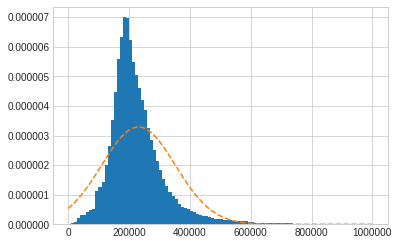

In [328]:
plt.hist(duration, density=True, bins=100, range=(0, 1000000))

x_norm = np.linspace(0, 1000000, 100000)
y_norm = stats.norm.pdf(x_norm, loc=duration_mean, scale=duration_std)
plt.plot(x_norm, y_norm, linestyle="dashed")

Уже из графика видно, что распределение длительности не соотвествует нормальному

### Танцевальность

Расчитываем среднее выборосное, несмешенное среднеквадратичное отколонение и медиану

In [329]:
danceability = df['danceability']

danceability_mean = danceability.mean()
danceability_std = danceability.std(ddof=1)
danceability_median = danceability.median()

danceability_mean, danceability_std, danceability_median

(0.5381497172015609, 0.1753457820476082, 0.5479999999999999)

Расчтиываем квартили

In [331]:
danceability_25 = danceability.quantile(q=0.25)
danceability_50 = danceability.quantile(q=0.5)
danceability_75 = danceability.quantile(q=0.75)

danceability_25, danceability_50, danceability_75

(0.41700000000000004, 0.5479999999999999, 0.667)

Проверяем распределение танцевальности на нормальность.

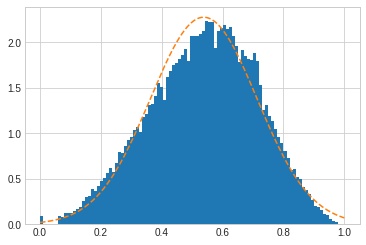

In [333]:
plt.hist(danceability, density=True, bins=100)

x_norm = np.linspace(0, 1, 100000)
y_norm = stats.norm.pdf(x_norm, loc=danceability_mean, scale=danceability_std)
plt.plot(x_norm, y_norm, linestyle="dashed")

По графику видим, что распределение неплохо соответствует нормальному

Следующим шагом построим Q-Q кривую и оценим как кватили нашего распределения соотвествуют теоретическим

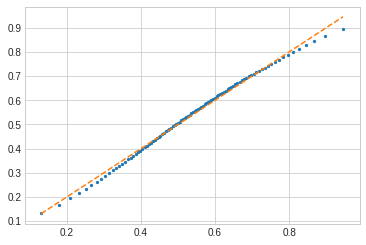

In [335]:
interval = np.linspace(0, 1, 100)
x = stats.norm.ppf(interval, loc=danceability_mean, scale=danceability_std)
y = np.quantile(danceability, interval)

plt.scatter(x, y, s=5)
plt.plot(x, x, color="C1", linestyle="dashed")

Опять же видим, что соответствие неплохое и с хорошей точнотью кватили нашего распределения сооветсвую теоретическим

Следующим шагом проверим распределение с помощью правил разброса. Сравним страндартное отклонение, 2 сигмы и 3 сигмы

In [338]:
for i in range(1, 4):
    true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
    sample_value = ((danceability >= danceability_mean - i * danceability_std) & (danceability <= danceability_mean + i * danceability_std)).sum() / danceability.shape[0]
    
    print(f"{i} sigma(s)")
    print(f"\ttheoretical:\t{true_value}")
    print(f"\tsamples:\t{sample_value}")

1 sigma(s)
	theoretical:	0.6826894921370859
	samples:	0.6622956994626535
2 sigma(s)
	theoretical:	0.9544997361036416
	samples:	0.9608143182527118
3 sigma(s)
	theoretical:	0.9973002039367398
	samples:	0.9991348309977693


Видим, что с небольшой погрешностью разброс соотвествует теоретическому

##### Делаем вывод о том, что распределение танцевальности, близко к нормальному 

### Гроскость

Расчитываем среднее выборосное, несмешенное среднеквадратичное отколонение и медиану

In [339]:
loudness = df['loudness']

loudness_mean = loudness.mean()
loudness_std = loudness.std(ddof=1)
loudness_median = loudness.median()

loudness_mean, loudness_std, loudness_median

(-11.37028930192044, 5.666764629571749, -10.474)

Квартили

In [340]:
loudness_25 = loudness.quantile(q=0.25)
loudness_50 = loudness.quantile(q=0.5)
loudness_75 = loudness.quantile(q=0.75)

loudness_25, loudness_50, loudness_75

(-14.47, -10.474, -7.117999999999999)

Проверяем распределение громкости на нормальность. Выполним все теже шаги, что и для предыдущего пункта

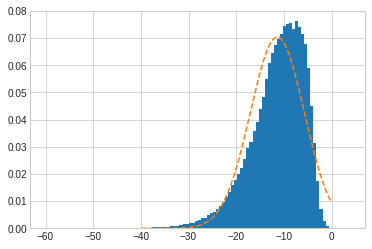

In [124]:
plt.hist(loudness, density=True, bins=100)

x_norm = np.linspace(-40, 0, 1000)
y_norm = stats.norm.pdf(x_norm, loc=loudness_mean, scale=loudness_std)
plt.plot(x_norm, y_norm, linestyle="dashed")

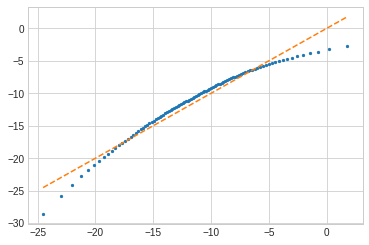

In [127]:
interval = np.linspace(0, 1, 100)
x = stats.norm.ppf(interval, loc=loudness_mean, scale=loudness_std)
y = np.quantile(loudness, interval)

plt.scatter(x, y, s=5)
plt.plot(x, x, color="C1", linestyle="dashed")

In [341]:
for i in range(1, 4):
    true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
    sample_value = ((loudness >= loudness_mean - i * loudness_std) & (loudness <= loudness_mean + i * loudness_std)).sum() / loudness.shape[0]
    
    print(f"{i} sigma(s)")
    print(f"\ttheoretical:\t{true_value}")
    print(f"\tsamples:\t{sample_value}")

1 sigma(s)
	theoretical:	0.6826894921370859
	samples:	0.7035354219023124
2 sigma(s)
	theoretical:	0.9544997361036416
	samples:	0.9587131935330089
3 sigma(s)
	theoretical:	0.9973002039367398
	samples:	0.9890941621691611


##### Можно сделать вывод, что распределение громкости достаточно далеко от нормального

### Корреляция и линейная регрессия

Посчитаем корреляцию популярности со всеми числовыми признаками

In [344]:
df[["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]].corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.593345,0.221077,0.063292,0.497488,-0.299829,-0.075293,0.466546,-0.135707,0.135047,0.009327
acousticness,-0.593345,1.000000,-0.265950,-0.079311,-0.750283,0.335821,-0.023871,-0.567072,-0.056077,-0.204982,-0.185540
danceability,0.221077,-0.265950,1.000000,-0.134500,0.220569,-0.281429,-0.105532,0.294170,0.225305,-0.004872,0.560242
duration_ms,0.063292,-0.079311,-0.134500,1.000000,0.036396,0.084814,0.034270,-0.014687,-0.058449,-0.028816,-0.198760
energy,0.497488,-0.750283,0.220569,0.036396,1.000000,-0.287692,0.126293,0.782982,-0.045226,0.249936,0.350086
instrumentalness,-0.299829,0.335821,-0.281429,0.084814,-0.287692,1.000000,-0.047397,-0.417033,-0.115735,-0.107570,-0.193929
liveness,-0.075293,-0.023871,-0.105532,0.034270,0.126293,-0.047397,1.000000,0.052985,0.147667,0.008124,-0.000426
loudness,0.466546,-0.567072,0.294170,-0.014687,0.782982,-0.417033,0.052985,1.000000,-0.105796,0.211114,0.308418
speechiness,-0.135707,-0.056077,0.225305,-0.058449,-0.045226,-0.115735,0.147667,-0.105796,1.000000,-0.010070,0.056383
tempo,0.135047,-0.204982,-0.004872,-0.028816,0.249936,-0.107570,0.008124,0.211114,-0.010070,1.000000,0.171182


Видим, что наибольшую корреляцию с популярностью имеют: аакустичность, энергия, громкость и танцевальность. Их и выберем для построения модели линейной регрессии

Потстроим можель с помощью метода наимеших квадратов. 
Вектор коэффициентов модели будет даваться формулой: $b=(X^TX)^{-1}X^TY$,
где X - матрица прзнаков, Y - вектор популярности

Построим матрицу X

In [346]:
ones = np.ones((df.shape[0], 1))

ones = np.ones((df.shape[0], 1))
X = np.hstack((df["acousticness"].to_numpy().reshape(-1, 1), 
               df["energy"].to_numpy().reshape(-1, 1), 
               df["loudness"].to_numpy().reshape(-1, 1), 
               df["danceability"].to_numpy().reshape(-1, 1)))
X = np.hstack((ones, X))
X

array([[ 1.0000e+00,  9.9500e-01,  1.9500e-01, -1.2428e+01,  7.0800e-01],
       [ 1.0000e+00,  9.9400e-01,  1.3500e-02, -2.8454e+01,  3.7900e-01],
       [ 1.0000e+00,  6.0400e-01,  2.2000e-01, -1.9924e+01,  7.4900e-01],
       ...,
       [ 1.0000e+00,  5.3800e-01,  5.3900e-01, -9.3320e+00,  5.1400e-01],
       [ 1.0000e+00,  7.1400e-02,  7.6100e-01, -2.5570e+00,  6.4600e-01],
       [ 1.0000e+00,  1.0900e-01,  4.2800e-01, -7.3870e+00,  5.1200e-01]])

Посчтиаем матрицу $(X^TX)$, и проверим ее определить на равеснство нулю

In [347]:
XTX = X.T.dot(X)
np.linalg.det(XTX)

2.121845149706489e+23

Определитеь явно далек от нуля

Выполним оставшиеся вычисления и найдем вектор коэффициентов b

In [348]:
y = df["popularity"].to_numpy()
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(X.T).dot(y)
b

array([ 54.96769922, -28.94986959,  -4.62706228,   0.81604907,
         4.47246476])

Убедимся, что средняя ошибка даваемая моделью равна нулю

In [157]:
z = X.dot(b)
e = y - z
e.mean()

-4.090849989599978e-13

In [349]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

Оценим качество модели с модели с помощью коэффициента детерминации по вормуле $R=1-{D(\epsilon)/D(y)}$, где $\epsilon$ - вектор ошибок, даваемых моделью. 

In [350]:
R = 1 - sum_of_squares(e) / sum_of_squares(y)
R

0.379229613323253

Коэффиуиент детерминации весьма далек от единицы, что говорит о том, что наша модель не очень хорошо писываем популярность. Скорее всего, реальная зависимость нелинейна

Проверим значимость полученного уровнения регресии с помощью F-теста Фишера

In [163]:
n = X.shape[0]
m = 4

k1 = m
k2 = n - m - 1

k1, k2

(4, 169904)

In [352]:
from scipy import stats
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

1.2447953139000922

Получили границу критической области, теперь проверим попадает ли статистика теста в эту область

In [353]:
F = (R / k1) / ((1 - R) / k2)
F

1047.8443161300677

Статистика попала в критическую область, такм образом, мы отвергаем гипотезу о том, что кожффициент детерминации равен нулю. Это означает, что построенная нами модель значимо соотвествует данным

Попробуем визуально оценить нашу модель с помощью гистаграм (я понимаю, что это далеко не лучший способ, но все-таки).

(array([8.610e+02, 9.260e+02, 1.026e+03, 1.144e+03, 1.156e+03, 1.344e+03,
        1.422e+03, 1.633e+03, 1.632e+03, 1.839e+03, 1.899e+03, 2.041e+03,
        2.059e+03, 2.142e+03, 2.270e+03, 2.252e+03, 2.385e+03, 2.455e+03,
        2.401e+03, 2.395e+03, 2.348e+03, 2.205e+03, 2.213e+03, 2.017e+03,
        1.980e+03, 1.934e+03, 1.801e+03, 1.753e+03, 1.667e+03, 1.691e+03,
        1.556e+03, 1.528e+03, 1.531e+03, 1.487e+03, 1.519e+03, 1.385e+03,
        1.413e+03, 1.374e+03, 1.325e+03, 1.328e+03, 1.302e+03, 1.324e+03,
        1.335e+03, 1.300e+03, 1.287e+03, 1.350e+03, 1.302e+03, 1.224e+03,
        1.266e+03, 1.273e+03, 1.294e+03, 1.325e+03, 1.333e+03, 1.359e+03,
        1.361e+03, 1.463e+03, 1.513e+03, 1.454e+03, 1.524e+03, 1.477e+03,
        1.538e+03, 1.530e+03, 1.625e+03, 1.676e+03, 1.788e+03, 1.923e+03,
        1.903e+03, 2.124e+03, 2.191e+03, 2.353e+03, 2.510e+03, 2.581e+03,
        2.715e+03, 2.736e+03, 2.967e+03, 3.023e+03, 3.074e+03, 3.260e+03,
        3.360e+03, 3.478e+03, 3.553e+0

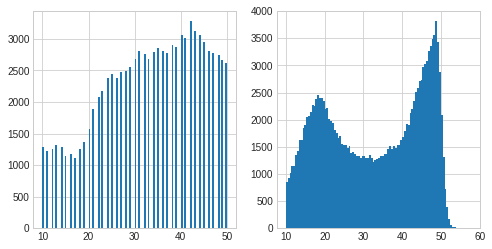

In [354]:
popularity_regr = b[0] * X[:, 0] + b[1] * X[:, 1] + b[2] * X[:, 2] + b[3] * X[:, 3] + b[4] * X[:, 4]

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(8, 4)
axes = axes.flatten()

axes[0].hist(df["popularity"], bins=100, range = (10, 50))
axes[1].hist(popularity_regr, bins=100, range = (10, popularity_regr.max()))

Наша модель соотвествует реальным данным хотябы по порядку величин

### С помощью дисперионного анализа проверим влият ли год написания композиции на ее популярность

In [356]:
unique_years = df["year"].unique()
popularity_year_means = df.groupby("year")["popularity"].mean()
popularity_mean = df["popularity"].mean()

Рассмотрим две суммы квадратов:
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$
где $y_{ij}$ — $j$-й элемент $i$-й выборки поулярности.

Первая сумма — отклонения между группами, вторая — отклонения внутри групп. Группировка произведена по году написания композиции

In [357]:
def SS_b():
    result = 0
    for year in unique_years:
        n = (df["year"]==year).sum()
        result += n * (popularity_year_means[year] - popularity_mean) ** 2
    return result

def SS_w():
    result = 0
    for year in unique_years:
        result += ((df["popularity"].where(df["year"]==year) - popularity_year_means[year]) ** 2).sum()
    return result

SS_b(), SS_w()

(64802263.503846265, 14342449.245613715)

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

In [358]:
k = unique_years.shape[0]
n = df["popularity"].count()

k1 = k - 1
k2 = n - k

sigma2_b = SS_b() / k1
sigma2_w = SS_w() / k2

sigma2_b, sigma2_w

(654568.3182206694, 84.46224431928646)

Статистика для проверки гипотезы $H_0$ (год написания копозиции не влияет на ее популярность):
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Как и ранее, критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

In [275]:
F = sigma2_b / sigma2_w
F

7749.83335448976

In [360]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

1.2447953139000922

##### Задавшись урвовнем значимости 0.05, имеем - статистика попала в критическую область, поэтому мы отвергаем гипотезу о том, что год написания композиции не влияет на ее популярность

### Факторный анализ числовых признаков

Проведем факторный анализ числовых признаков с помощью метода главных компонент

Стоставим матрицу числовых признаков. Центрируем ее (то есть вычтем из каждого столбца среднее по нему), вычислим матрицу несмещенных оценок ковариций и посчитаем собственные значения и собственные векторы получившейся матрицы

In [361]:
samples = np.hstack((df["acousticness"].to_numpy().reshape(-1, 1), 
               df["danceability"].to_numpy().reshape(-1, 1), 
               df["duration_ms"].to_numpy().reshape(-1, 1), 
               df["energy"].to_numpy().reshape(-1, 1),
               df["instrumentalness"].to_numpy().reshape(-1, 1),
               df["liveness"].to_numpy().reshape(-1, 1),
               df["loudness"].to_numpy().reshape(-1, 1),
               df["tempo"].to_numpy().reshape(-1, 1),
               df["valence"].to_numpy().reshape(-1, 1),
               df["speechiness"].to_numpy().reshape(-1, 1)))

samples_centered = samples - samples.mean(axis=0, keepdims=True)

cov = np.cov(samples_centered.T, ddof=1)
eigenvalues, eigenvetors = np.linalg.eig(cov)

print(f"eigenvalues:\n{eigenvalues}\n")
print(f"eigenvetors:\n{eigenvetors}\n")

eigenvalues:
[1.47190091e+10 9.44849293e+02 3.07352599e+01 1.12070449e-01
 7.77997420e-02 6.67032072e-02 3.37509479e-02 1.03727438e-02
 1.44878599e-02 2.35159496e-02]

eigenvetors:
[[ 2.46210358e-07 -2.58875490e-03  3.65112103e-02  8.44877644e-01
   3.77825873e-01 -1.05028264e-01 -1.03014300e-01 -2.73449152e-01
   2.09490042e-01 -4.22635524e-02]
 [ 1.94391751e-07 -3.73701521e-05 -9.54833649e-03 -1.60410604e-01
   2.02456766e-01 -3.48874426e-01  1.74299266e-01 -5.73898892e-01
  -4.55065039e-01  4.94621868e-01]
 [-1.00000000e+00  7.31980196e-06 -3.90216811e-07  9.02804169e-08
   4.56802777e-07 -3.55805730e-07  2.83166674e-08  2.94372204e-08
   2.46259753e-08  2.42039627e-08]
 [-8.02146601e-08  2.23160633e-03 -3.60297760e-02 -2.96634309e-01
  -2.23331812e-01 -1.09498469e-01 -2.18557938e-01 -6.66875446e-01
   5.09987690e-01 -3.10258084e-01]
 [-2.16247271e-07 -1.08793845e-03  2.24981738e-02  3.58615220e-01
  -8.23487444e-01 -3.93355643e-01  9.25787903e-04  5.00616845e-02
  -6.04292016e-02  

Видим, что первое собственное значение значительно превосходит остальные, поэтому берем, чтобы получить новые признаки (в данном случае один) берем первый собственный вектор. Домножим матрицу samples_centered на этот вектор, чтобы получить новую матрицу объект-признак.

In [363]:
new_samples = samples_centered.dot(eigenvetors[:, [0]])
print(new_samples)

[[ 72758.15898194]
 [-50726.8412779 ]
 [127106.15889306]
 ...
 [ 50706.15902252]
 [ 64098.15907219]
 [ 16619.15871012]]


Качество метода главных компонент можно оценить, сравнивая дисперсии признаков до и после применения метода. 
    
Пусть $\sigma_X^2$ — сумма дисперсий признаков до применения метода, а $\sigma_Y^2$ — сумма дисперсий после применения метода. Тогда __доля объяснённой дисперсии__ равна отношению 
$$\dfrac{\sigma_Y^2}{\sigma_X^2}$$

In [365]:
variance_before = np.var(samples, axis=0, ddof=1).sum()
variance_after = np.var(new_samples, axis=0, ddof=1).sum()

variance_after/variance_before

0.9999999336963997

Такое значение доли объяснённой дисперсии можно интерпретировать так: используя новые данные вместо старых, мы сохраним около $99.99\%$ информации. Даже странно, что мы потеряли так мало информации